# Model improvement and selection


<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="../assets/yogen-logo.png" alt="yogen" style="width: 200px; float: right;"/>


# Generalizability of our models

We want to train models on known data in order to make inferences (predictions) on unknown data -> **supervised ML**

How do we know how good our models are? 

# Metrics for regression

MSE: Mean Squared Error

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - h(x_i))^2$$

MAE: Mean Absolute Error 

$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - h(x_i)|$$

MAPE: Mean Absolute Percent Error

$$MAE = \frac{1}{n} \sum_{i=1}^{n} \frac{|y_i - h(x_i)|}{y_i}$$

Explained Variance:


$$explained\_{}variance(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$$



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config Completer.use_jedi = False

https://scikit-learn.org/stable/datasets/toy_dataset.html

In [4]:
from sklearn import datasets

diabetes = datasets.load_diabetes()

diabetes_X, diabetes_y = diabetes['data'], diabetes['target']

In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

nn = MLPRegressor()



mean_absolute_error(y_test, y_hat), np.sqrt(mean_squared_error(y_test, y_hat)) 

/Users/dani/opt/anaconda3/envs/master2022/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


(123.65416761001626, 143.42457577628306)

# Metrics in classification

A first approximation could be the % of examples that we got right. This is called _accuracy_.

In [15]:
breast = datasets.load_breast_cancer()
breast_X, breast_y = breast['data'], breast['target']

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(breast_X, breast_y)
lr.fit(X_train, y_train)

y_hat = lr.predict(X_test)
probs = lr.predict_proba(X_test)

/Users/dani/opt/anaconda3/envs/master2022/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score

precision_score(y_test, y_hat), recall_score(y_test, y_hat), f1_score(y_test, y_hat)

(0.9176470588235294, 0.9397590361445783, 0.9285714285714286)

In [28]:
roc_auc_score(y_test, probs[:, 1])

0.9821285140562248

What if we had very few positive examples?

## The Confusion Matrix

![A confusion matrix](https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg)

from https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781838555078/6/ch06lvl1sec34/confusion-matrix

## Precision and recall

![Precision and recall](https://upload.wikimedia.org/wikipedia/commons/2/26/Precisionrecall.svg)

Probably best to understand them as conditional probabilities:

Precision: What is the probability that an example is actually positive, given I've predicted it to be positive?

Recall: What is the probability of me calling an example positive, given it is actually positive?

from https://en.wikipedia.org/wiki/Precision_and_recall

## F1 measure

A good default choice because it combines both precission and recall:

$$ F_1 = 2 \cdot \frac{precision \cdot recall}{precision + recall}$$


### $F_\beta$

F beta is a generalization of F1 that uses a (positive) weighting $\beta$ so that recall is considered $\beta$ times more important than precision.

## Precision-recall and ROC curves

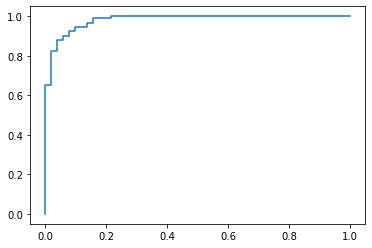

In [33]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])

plt.plot(fpr, tpr)

# The bias-variance tradeoff


Bias: systematic error: your model doesn't quite capture the shape of the underlying function, but this doesn't change with different subsets of the input data.

Variance: Your model changes a lot depending on the input data

![Bias and variance](figs/bias-variance.png)

from http://scott.fortmann-roe.com/docs/BiasVariance.html

How can we decompose these two terms in practice?


![Model complexity and generalizability](https://i.stack.imgur.com/GEJIM.png)

from http://scott.fortmann-roe.com/docs/BiasVariance.html

What we want is generally to go into the overfitting zone to make sure we are not leaving performance on the table and then tune back our model with some regularization technique.

In [61]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(min_samples_leaf=5,
                            n_estimators=100)

rf.fit(X_train, y_train)

roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]), roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1])

(0.9820971867007673, 0.9988280792218447)

## Train-validation-test split

![Train-validation-test split](https://upload.wikimedia.org/wikipedia/commons/b/bb/ML_dataset_training_validation_test_sets.png)


from https://en.wikipedia.org/wiki/Training,_validation,_and_test_sets

## K-fold cross validation

![5-fold cross validation](https://www.mltut.com/wp-content/uploads/2020/05/cross-validation.png)

from https://www.mltut.com/k-fold-cross-validation-in-machine-learning-how-does-k-fold-work/

# K-fold Cross validation in sklearn


In [66]:
from sklearn.model_selection import cross_val_score

cross_val_score(X=X_train,y=y_train, estimator=rf )

array([0.98837209, 1.        , 0.95294118, 0.96470588, 0.91764706])

Pros

* Estimation of variance of our model
* Better use of data

Cons

* Computational cost

## Visualizing the result of a cross-validation

### Overfitting

![Under- and overfitting](https://djsaunde.files.wordpress.com/2017/07/bias-variance-tradeoff.png)

from https://djsaunde.wordpress.com/2017/07/17/the-bias-variance-tradeoff/

## `sklearn` Pipelines for fun and profit

For:

1. Convenience

2. Joint parameter selection

In [ ]:
# BAD!
after_a = step_a.fit_transform(train)
after_b = step_b.fit_transform(after_a)
after_c = step_c.fit_transform(after_b)
classifier.fit(after_c)

# NOOOOO!
after_a = step_a.fit_transform(test)
after_b = step_b.fit_transform(after_a)
after_c = step_c.fit_transform(after_b)
predictions = classifier.transform(after_c) # This classifier knows information about the future

### Without pipelines

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(breast_X, breast_y)

scaler = StandardScaler()
classifier = RandomForestClassifier()

scaled = scaler.fit_transform(X_train)
classifier.fit(scaled, y_train)

test_scaled = scaler.transform(X_test)
y_hat = classifier.predict(test_scaled)

### With pipelines

In [80]:
X_train, X_test, y_train, y_test = train_test_split(breast_X, breast_y)

scaler = StandardScaler()
classifier = RandomForestClassifier()

pipeline = Pipeline(steps=[('step_1', scaler), 
                           ('step_2', classifier)])

pipeline.fit(X_train, y_train)
y_hat = pipeline.predict(X_test)

### And now the magic

https://scikit-learn.org/stable/modules/model_evaluation.html

In [100]:
from sklearn.model_selection import GridSearchCV, ParameterGrid

grid = {'step_2__n_estimators': [10, 25, 100],
        'step_2__min_samples_leaf': [1, 5, 10]}

grid_search = GridSearchCV(pipeline, 
                           param_grid=grid,
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('step_1', StandardScaler()),
                                       ('step_2', RandomForestClassifier())]),
             param_grid={'step_2__min_samples_leaf': [1, 5, 10],
                         'step_2__n_estimators': [10, 25, 100]},
             return_train_score=True)

In [101]:
grid_search.best_estimator_

Pipeline(steps=[('step_1', StandardScaler()),
                ('step_2', RandomForestClassifier())])

In [102]:
grid_search.best_params_

{'step_2__min_samples_leaf': 1, 'step_2__n_estimators': 100}

In [106]:
pd.options.display.max_columns = None
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_step_2__min_samples_leaf,param_step_2__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013719,0.003754,0.001084,0.000088,1,10,"{'step_2__min_samples_leaf': 1, 'step_2__n_est...",0.976744,0.952941,0.952941,0.988235,0.905882,0.955349,0.028277,3,0.997059,1.000000,1.000000,0.994135,1.000000,0.998239,0.002347
1,0.024383,0.000526,0.001698,0.000173,1,25,"{'step_2__min_samples_leaf': 1, 'step_2__n_est...",0.953488,0.964706,0.952941,0.988235,0.929412,0.957756,0.019090,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.093544,0.000958,0.005226,0.000098,1,100,"{'step_2__min_samples_leaf': 1, 'step_2__n_est...",0.965116,0.952941,0.952941,0.988235,0.941176,0.960082,0.015983,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.009790,0.000349,0.001024,0.000201,5,10,"{'step_2__min_samples_leaf': 5, 'step_2__n_est...",0.976744,0.929412,0.952941,0.976471,0.905882,0.948290,0.027496,5,0.976471,0.985337,0.982405,0.985337,0.982405,0.982391,0.003238
4,0.022991,0.000316,0.001809,0.000303,5,25,"{'step_2__min_samples_leaf': 5, 'step_2__n_est...",0.965116,0.929412,0.941176,0.976471,0.917647,0.945964,0.021892,7,0.982353,0.988270,0.982405,0.976540,0.988270,0.983567,0.004392
5,0.090753,0.002170,0.005344,0.000147,5,100,"{'step_2__min_samples_leaf': 5, 'step_2__n_est...",0.953488,0.952941,0.941176,0.988235,0.929412,0.953051,0.019687,4,0.982353,0.988270,0.985337,0.982405,0.985337,0.984740,0.002206
6,0.009835,0.000852,0.000984,0.000117,10,10,"{'step_2__min_samples_leaf': 10, 'step_2__n_es...",0.953488,0.917647,0.929412,0.941176,0.929412,0.934227,0.012170,9,0.973529,0.970674,0.979472,0.953079,0.973607,0.970072,0.008966
7,0.022451,0.000393,0.001681,0.000131,10,25,"{'step_2__min_samples_leaf': 10, 'step_2__n_es...",0.953488,0.917647,0.941176,0.988235,0.929412,0.945992,0.024258,6,0.976471,0.973607,0.976540,0.961877,0.976540,0.973007,0.005678
8,0.086980,0.000900,0.005119,0.000208,10,100,"{'step_2__min_samples_leaf': 10, 'step_2__n_es...",0.953488,0.917647,0.941176,0.988235,0.917647,0.943639,0.026241,8,0.973529,0.982405,0.973607,0.976540,0.976540,0.976524,0.003227


#### Exercise

Train a RandomForestClassifier on the FIFA player data. Test different combinations of parameters for the RandomForestClassifier and for the preprocessing steps. A pipeline could look like this:

1. StandardScaler
2. PCA
3. RandomForestClassifier

In [120]:
players = pd.read_csv('/Users/dani/master_data/fifa/players_20.csv', index_col=0)
players = players[players['overall'] > 75]
numeric = players.select_dtypes('int')

In [121]:
def is_midfielder(player_positions):
    
    positions = player_positions.split(', ')
    
    for pos in positions:
        if pos.endswith('M'):
            return True
        
    return False
    
sample = 'RD'
is_midfielder(sample)

False

In [122]:
target = players['player_positions'].apply(is_midfielder)
target

sofifa_id
158023    False
20801     False
190871     True
200389    False
183277    False
          ...  
245326     True
245327    False
251691     True
251692    False
251698    False
Name: player_positions, Length: 1615, dtype: bool

In [141]:
%%time
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(numeric, target, random_state=1789)

pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                           ('pca', PCA()),
                           ('classifier', RandomForestClassifier())])


grid_search = GridSearchCV(pipeline,
                           param_grid = {'pca__n_components': [2, 3, 5, 10, None],
                                         'classifier__n_estimators': [5, 25, 100],
                                         'classifier__min_samples_leaf': [1, 5, 10]} )

grid_search.fit(X_train, y_train)

CPU times: user 1min 8s, sys: 27 s, total: 1min 35s
Wall time: 19 s


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__min_samples_leaf': [1, 5, 10],
                         'classifier__n_estimators': [5, 25, 100],
                         'pca__n_components': [2, 3, 5, 10, None]})

In [143]:
grid_search.best_params_

{'classifier__min_samples_leaf': 1,
 'classifier__n_estimators': 100,
 'pca__n_components': None}

In [144]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__min_samples_leaf,param_classifier__n_estimators,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014792,0.001925,0.002052,0.000251,1,5,2,"{'classifier__min_samples_leaf': 1, 'classifie...",0.773663,0.747934,0.727273,0.710744,0.731405,0.738204,0.021316,45
1,0.013235,0.001227,0.002022,0.000319,1,5,3,"{'classifier__min_samples_leaf': 1, 'classifie...",0.769547,0.801653,0.739669,0.756198,0.760331,0.765480,0.020513,40
2,0.014525,0.001349,0.002000,0.000228,1,5,5,"{'classifier__min_samples_leaf': 1, 'classifie...",0.753086,0.797521,0.780992,0.793388,0.797521,0.784502,0.016836,30
3,0.015604,0.000655,0.002298,0.000913,1,5,10,"{'classifier__min_samples_leaf': 1, 'classifie...",0.818930,0.776860,0.780992,0.789256,0.776860,0.788579,0.015836,27
4,0.020477,0.001304,0.002135,0.000266,1,5,None,"{'classifier__min_samples_leaf': 1, 'classifie...",0.753086,0.772727,0.793388,0.797521,0.768595,0.777064,0.016434,33
5,0.038087,0.001007,0.003509,0.000316,1,25,2,"{'classifier__min_samples_leaf': 1, 'classifie...",0.761317,0.772727,0.752066,0.698347,0.739669,0.744825,0.025650,44
6,0.037011,0.001505,0.003341,0.000148,1,25,3,"{'classifier__min_samples_leaf': 1, 'classifie...",0.810700,0.814050,0.780992,0.780992,0.793388,0.796024,0.014136,24
7,0.044542,0.002292,0.003253,0.000167,1,25,5,"{'classifier__min_samples_leaf': 1, 'classifie...",0.802469,0.830579,0.847107,0.805785,0.822314,0.821651,0.016419,6
8,0.053539,0.001302,0.003295,0.000218,1,25,10,"{'classifier__min_samples_leaf': 1, 'classifie...",0.806584,0.830579,0.842975,0.830579,0.789256,0.819995,0.019374,9
9,0.084004,0.003257,0.003409,0.000284,1,25,None,"{'classifier__min_samples_leaf': 1, 'classifie...",0.806584,0.789256,0.851240,0.814050,0.822314,0.816689,0.020430,11


In [147]:
preds = grid_search.predict(X_test)
f1_score(y_test, preds)

0.8277511961722488

## Targeting metrics other than accuracy

[The scoring parameter: defining model evaluation rules](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules)

In [148]:
%%time
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = train_test_split(numeric, target, random_state=1789)

pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                           ('pca', PCA()),
                           ('classifier', RandomForestClassifier())])


grid_search = GridSearchCV(pipeline,
                           param_grid = {'pca__n_components': [2, 3, 5, 10, None],
                                         'classifier__n_estimators': [5, 25, 100],
                                         'classifier__min_samples_leaf': [1, 5, 10]},
                           scoring='f1')

grid_search.fit(X_train, y_train)

CPU times: user 1min 9s, sys: 27.2 s, total: 1min 36s
Wall time: 19 s


GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__min_samples_leaf': [1, 5, 10],
                         'classifier__n_estimators': [5, 25, 100],
                         'pca__n_components': [2, 3, 5, 10, None]},
             scoring='f1')

In [149]:
grid_search.best_params_

{'classifier__min_samples_leaf': 1,
 'classifier__n_estimators': 100,
 'pca__n_components': None}

In [150]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__min_samples_leaf,param_classifier__n_estimators,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015552,0.003071,0.002650,0.000347,1,5,2,"{'classifier__min_samples_leaf': 1, 'classifie...",0.736842,0.705882,0.752000,0.719008,0.712551,0.725257,0.016884,45
1,0.013164,0.000882,0.002584,0.000239,1,5,3,"{'classifier__min_samples_leaf': 1, 'classifie...",0.734694,0.814815,0.774194,0.763780,0.763052,0.770107,0.025921,40
2,0.012896,0.000921,0.002443,0.000216,1,5,5,"{'classifier__min_samples_leaf': 1, 'classifie...",0.750000,0.772532,0.828685,0.807843,0.793249,0.790462,0.027311,31
3,0.015668,0.001216,0.002553,0.000264,1,5,10,"{'classifier__min_samples_leaf': 1, 'classifie...",0.776371,0.805085,0.811024,0.773663,0.758333,0.784895,0.019973,35
4,0.021254,0.000645,0.002597,0.000295,1,5,None,"{'classifier__min_samples_leaf': 1, 'classifie...",0.735043,0.780083,0.786611,0.790123,0.686441,0.755660,0.039896,44
5,0.036726,0.001018,0.004038,0.000481,1,25,2,"{'classifier__min_samples_leaf': 1, 'classifie...",0.768627,0.774194,0.777778,0.736000,0.750988,0.761517,0.015733,42
6,0.036456,0.000248,0.003914,0.000190,1,25,3,"{'classifier__min_samples_leaf': 1, 'classifie...",0.792157,0.806452,0.798387,0.795276,0.793651,0.797184,0.005074,28
7,0.045601,0.001317,0.003583,0.000108,1,25,5,"{'classifier__min_samples_leaf': 1, 'classifie...",0.785124,0.827869,0.845850,0.829457,0.798354,0.817331,0.022221,13
8,0.051615,0.001511,0.003721,0.000201,1,25,10,"{'classifier__min_samples_leaf': 1, 'classifie...",0.803279,0.840816,0.844622,0.828125,0.788382,0.821045,0.021815,11
9,0.083005,0.001509,0.003990,0.000546,1,25,None,"{'classifier__min_samples_leaf': 1, 'classifie...",0.815126,0.794872,0.860759,0.835938,0.822581,0.825855,0.021935,8


In [152]:
preds = grid_search.predict(X_test)
f1_score(y_test, preds)

0.829736211031175

# Additional References


[An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)

[Introduction to Machine Learning with Python](http://shop.oreilly.com/product/0636920030515.do)

[scikit-learn cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Scikit_Learn_Cheat_Sheet_Python.pdf)

[Regression metrics in sklearn](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

[A Simple Guide to Scikit-learn Pipelines](https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf)

[scikit-learn for developers](https://scikit-learn.org/stable/developers/develop.html)

[Creating your own estimator in scikit-learn](http://danielhnyk.cz/creating-your-own-estimator-scikit-learn/)